

## About CHAID
- Acronymm for Chi Square. Automatic Interaction Detection
- We can do both driver analysis wihich by understanding what matters the most, and we can also do segmentation.
- It`s differente classic clustering technique because we have a dependent variable or an output, and clustering technique only have independent variable for use cases


- Applications
    - When you sell beer through newsletters or telemarketing or in-person sales, usally take time to prepare all to sell it;
    - Knowing your target audience is helpfull because you desing your sale in the best way possible;

- Description
    - Importance ranking: CHAID figures out which drivers matter more, by doing significance tests;
    - Segmented Driver Analysis: CHAID will segment the population and perform driver analysis for each of them.
    - Interpretability: CHAID provides easy to read graphs with customer segments
    - Divide samples in groups and get a weight for each ones.

- CHAID processes
    - Looks at all predictors and tries to find the one where the `yes` is most diffenret from the `no`.
    - The statistical process it that trade goes through all of the drivers that we have and  tries to create this type
    of analysis, seeing where the note is most different from this.

- How does it work?
    - CHAID performs a chi-square test. It shows whether the frequencies of the categorical variables are different or not. 
    Very similar to t-test but it is a test of variance, and ideal for categorical variables.
    
- And then?
    - After if finds the first segment split, tries to find the next where the ''yes'' differs most from the ''no'''

- Last few things consider
    - Description:
        - Test size: you can choose how many levels the tree will have;
        - Bucket size: you can choose a mininum threshold that you want your buckets to have;
        - Continuous variables: CHAID accepts ONLY categorical variables.


## Case of study
 What drives people to get callbacks when they apply to jobs. Send the resume and when receibe a call.

Labor Market Ethnic Discrimination:
- Cross-section data about resume, call-back and employer information;
- 4870 fictious resumes sent in response to employment advertisements in chicago and boston in 2001;
- The resumes contained information concerning the ehtnicity of the aplicant.

We do, step by step:

1. Variable selection;(discovery specific to drive analysis.)
2. Transforming continuous variables into categorical;(CHAID is to no allow us continuous variables.)
3. Do your first tree;
4. Prune it for better interpratability;

Problem Statement
- We have in two variable and create a two dimensions matrix confuision for to analysis their correlation between them. But if there is one more, 3 variable and so we create a 3 dimension matrix?No, we can do 2 in 2 confuision matrix for they 3, but the problem have more complex and there are more variable? So in this case we use a segmentation analysis for help us because her can do find groups about the dataset


# Imports

In [16]:
# !pip install chaid
# !pip install -U orca
# !pip install graphviz 
# !pip install statsmodels

In [17]:
# !pip install plotly >= 4.0.0
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage-O/usr/local/bin/orca
# !chmod + x / usr / local / bin / orca
# !apt - get install xvfb libgtk2.0 - 0 libgconf - 2 - 4
# !wget https://raw.githubusercontent.com/prathibha13/Exploratory-Data-Analysis-on-Resume-data/main/ResumeNames.csv

In [18]:
# import orca
import plotly
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go

from CHAID import Tree

# Load Data and prepare

In [19]:
data = pd.read_csv('./data/ResumeNames.csv').drop(columns="Unnamed: 0")
data.head()                               

,name,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,Allison,female,cauc,low,no,chicago,2,6,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,Kristen,female,cauc,high,no,chicago,3,6,no,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,Lakisha,female,afam,low,no,chicago,1,6,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,Latonya,female,afam,high,no,chicago,4,6,no,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,Carrie,female,cauc,high,no,chicago,3,22,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


- `call` is indepent variable;
- `name` is too much variable and then we discard.

In [20]:
data = data.iloc[:,1:]
data.head()

,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,military,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,female,cauc,low,no,chicago,2,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,female,cauc,high,no,chicago,3,6,no,yes,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,female,afam,low,no,chicago,1,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,female,afam,high,no,chicago,4,6,no,yes,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,female,cauc,high,no,chicago,3,22,no,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


find unique values

In [21]:
data.apply(pd.Series.nunique)

gender           2
ethnicity        2
quality          2
call             2
city             2
jobs             7
experience      26
honors           2
volunteer        2
military         2
holes            2
school           2
email            2
computer         2
special          2
college          2
minimum         13
equal            2
wanted           6
requirements     2
reqexp           2
reqcomm          2
reqeduc          2
reqcomp          2
reqorg           2
industry         7
dtype: int64

show types data columns

In [22]:
data.dtypes

gender          object
ethnicity       object
quality         object
call            object
city            object
jobs             int64
experience       int64
honors          object
volunteer       object
military        object
holes           object
school          object
email           object
computer        object
special         object
college         object
minimum         object
equal           object
wanted          object
requirements    object
reqexp          object
reqcomm         object
reqeduc         object
reqcomp         object
reqorg          object
industry        object
dtype: object

# Transforming numeric variables

visualize jobs variable

<AxesSubplot:xlabel='jobs', ylabel='Density'>

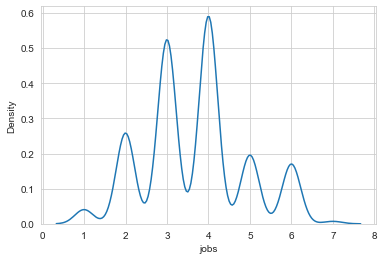

In [23]:
sns.set_style('whitegrid')
sns.kdeplot(data.jobs)

transform jobs variable

In [24]:
data.jobs = pd.cut(x = data.jobs,
                   bins = [-1, 2.9,4.9,9],
                   labels = [0,1,2])
data.jobs

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [25]:
data.jobs = pd.factorize(data.jobs)[0]
data.jobs

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: int64

visualize experience variable

<AxesSubplot:xlabel='experience', ylabel='Density'>

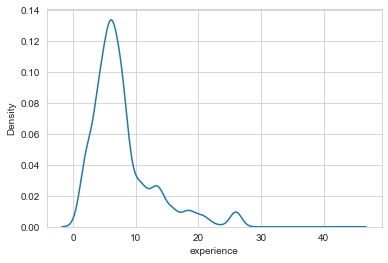

In [26]:
sns.set_style('whitegrid')
sns.kdeplot(data.experience)

transform experience variable

In [27]:
data.experience = pd.qcut(x = data.experience,
                          q = 3,       
                          labels = [0,1,2])
data.experience = pd.factorize(data.experience)[0]
data.experience.to_frame()

,experience
0,0
1,0
2,0
3,0
4,1
...,...
4865,2
4866,0
4867,0
4868,2


## Transform minimum and remaining variables

Minimum variable

In [28]:
data.minimum.value_counts()

none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: minimum, dtype: int64

Transform minimum variable

In [29]:
replacement_dictionary = {'none': 0,
                          '0': 0,
                          '0.5': 0,
                          '1': 1,
                          '2': 1,
                          'some': 2,
                          '3': 2,
                          '4': 2,
                          '5': 3,
                          '6': 3,
                          '7': 3,
                          '8': 3,
                          '10': 3}
data['minimum'] = data['minimum'].replace(replacement_dictionary)
data.minimum                       

0       3
1       3
2       3
3       3
4       2
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: minimum, Length: 4870, dtype: int64

transforming remaining variables

In [30]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,3,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,3,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,3,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,1,2,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0


# CHAID

get y name

In [31]:
y_name = data.call_yes.name
y_name

'call_yes'

The CHAID treat the 'yes' call level oposite the 'yes' or 'not'.

Get IV names

In [32]:
X_names = data.drop(columns = 'call_yes').columns
print(X_names)
print(len(X_names))

Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
       'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
       'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
       'wanted_other', 'wanted_retail sales', 'wanted_secretary',
       'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
       'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')
34


note that not include No dummies columns.

The CHAID tree

In [35]:
dict(zip(X_names, ['ordinal'] * 3 + ['nominal'] * 31))

{'jobs': 'ordinal',
 'experience': 'ordinal',
 'minimum': 'ordinal',
 'gender_male': 'nominal',
 'ethnicity_cauc': 'nominal',
 'quality_low': 'nominal',
 'city_chicago': 'nominal',
 'honors_yes': 'nominal',
 'volunteer_yes': 'nominal',
 'military_yes': 'nominal',
 'holes_yes': 'nominal',
 'school_yes': 'nominal',
 'email_yes': 'nominal',
 'computer_yes': 'nominal',
 'special_yes': 'nominal',
 'college_yes': 'nominal',
 'equal_yes': 'nominal',
 'wanted_office support': 'nominal',
 'wanted_other': 'nominal',
 'wanted_retail sales': 'nominal',
 'wanted_secretary': 'nominal',
 'wanted_supervisor': 'nominal',
 'requirements_yes': 'nominal',
 'reqexp_yes': 'nominal',
 'reqcomm_yes': 'nominal',
 'reqeduc_yes': 'nominal',
 'reqcomp_yes': 'nominal',
 'reqorg_yes': 'nominal',
 'industry_finance/insurance/real estate': 'nominal',
 'industry_health/education/social services': 'nominal',
 'industry_manufacturing': 'nominal',
 'industry_trade': 'nominal',
 'industry_transport/communication': 'nomina

Is need identifies because ordinal have a hierarchy and nominal columns category not.

In [33]:
# Data - indepent variables
# dict(zip... - determines if coluns are ordinal or nominal type
# y_name - dependt variable call_yes
# max_depth - tree CHAID`s levels depth
# min_child_node_size - how many child there is a level depth

model = Tree.from_pandas_df(data,
                            dict(zip(X_names, ['ordinal']*3 + ['nominal'] * 31)),
                            y_name,
                            max_depth = 3,
                            min_child_node_size = 250)

# Visualization

In [40]:
# Crates a .gv file about tree CHAID.
# model.render(path =None, view = None)